In [3]:
import random
def random_select(f='s',n=0):
    if f!='r':
        writer_id = 'Writer_' + str(random.randint(0,54))
    else:
        writer_id = 'Writer_' + str(n)
    a=0
    for i in range(24):
        genuine_sample = writers_genuine[writer_id][a][0]  # First genuine signature (resized image)
        forgery_sample = writers_forgery[writer_id][a][0]  # First forgery signature (resized image)
        
        # Display both for comparison
        plt.subplot(1, 2, 1)
        plt.title(f'Genuine: {writer_id}')
        plt.imshow(genuine_sample, cmap='gray')
        
        plt.subplot(1, 2, 2)
        plt.title(f'Forgery: {writer_id}')
        plt.imshow(forgery_sample, cmap='gray')
        
        plt.show()
        a+=1

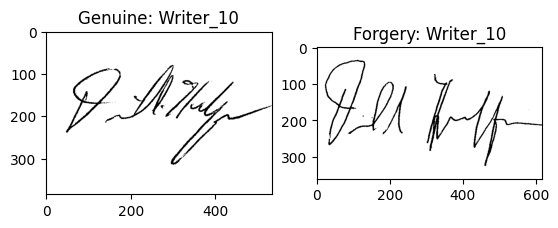

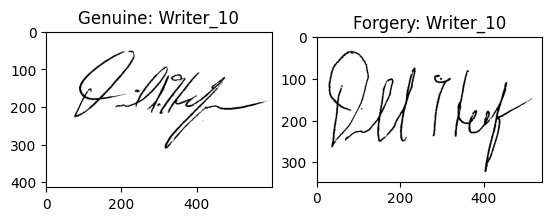

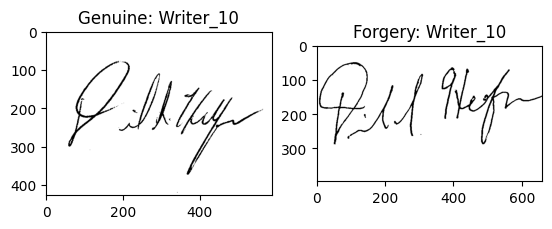

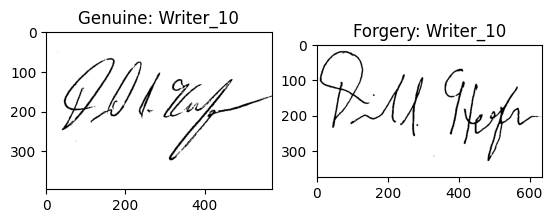

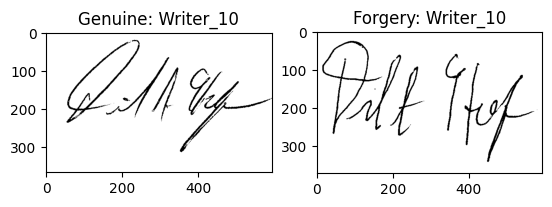

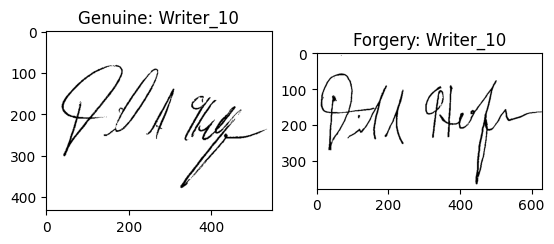

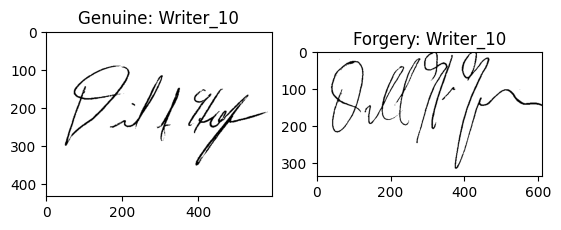

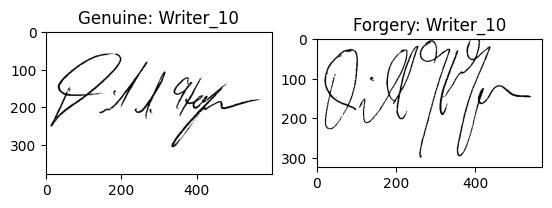

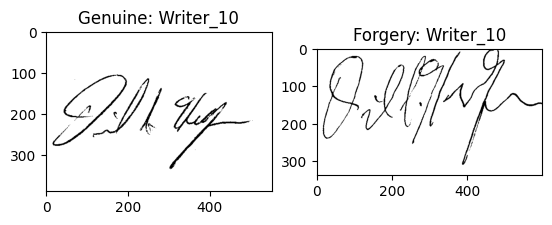

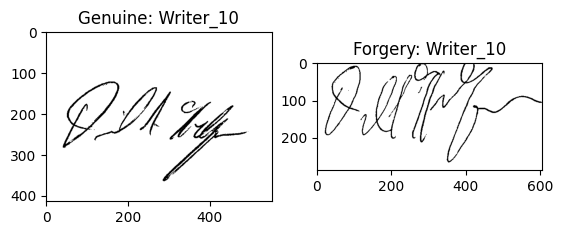

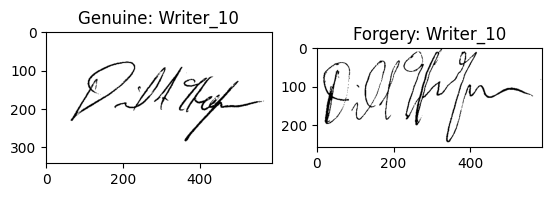

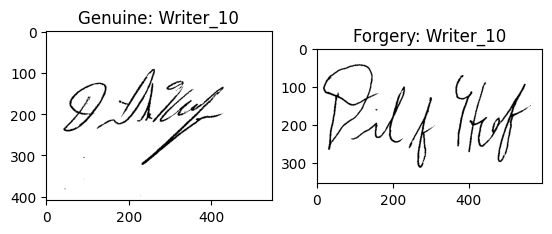

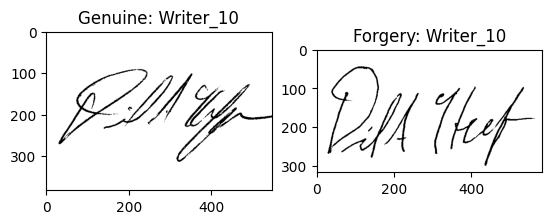

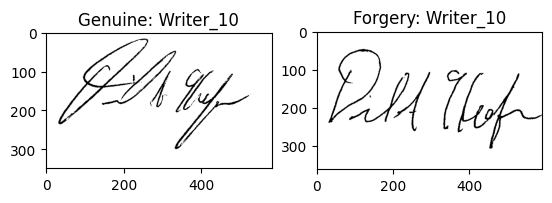

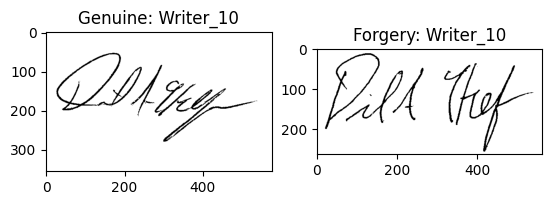

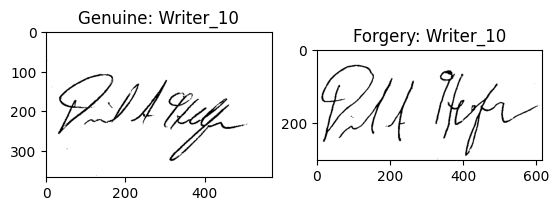

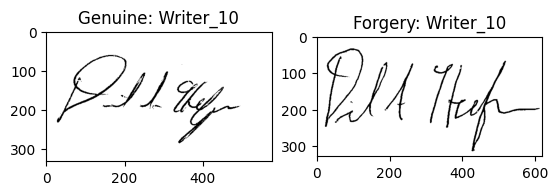

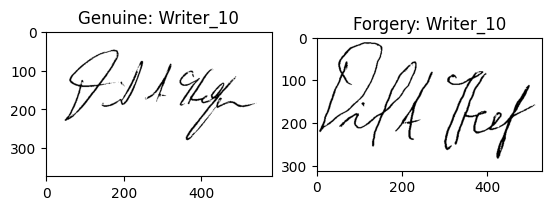

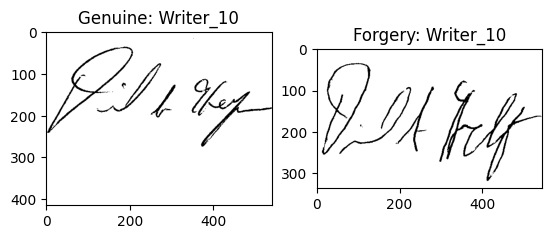

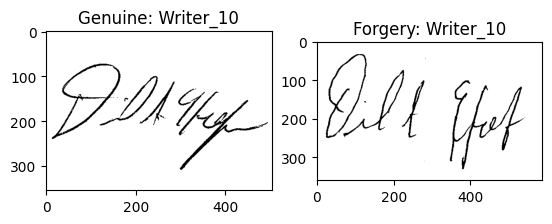

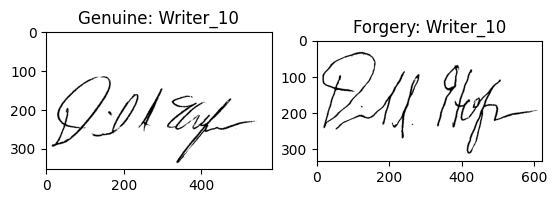

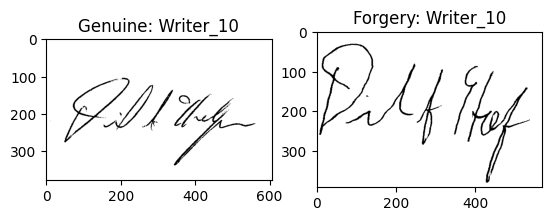

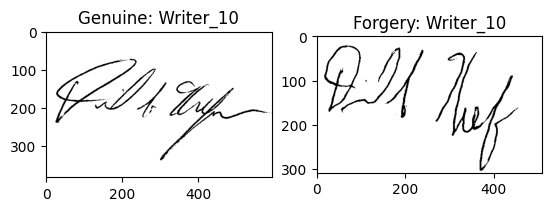

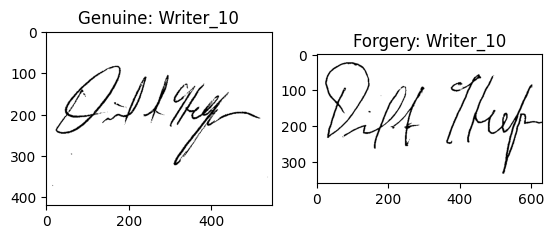

In [3]:
random_select(2)

In [10]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
from skimage.feature import corner_harris, corner_peaks
import matplotlib.pyplot as plt

base_dir = r'C:\Users\kumar\Desktop\random\project\Codes\signatures'
forgery_dir = os.path.join(base_dir, 'full_forg')
genuine_dir = os.path.join(base_dir, 'full_org')

# Additional preprocessing to encode each writer
def load_images_for_writer_identification(folder_path, prefix, num_writers=55, num_samples_per_writer=24, img_size=(128, 128)):
    data = []
    labels = []
    for i in range(1, num_writers + 1):
        for j in range(1, num_samples_per_writer + 1):
            filename = f"{prefix}_{i}_{j}.png"
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                resized_image = cv2.resize(image, img_size)
                normalized_image = resized_image / 255.0
                data.append(normalized_image)
                labels.append(i)  # Use writer number as label
            else:
                print(f"Warning: Image {image_path} not found.")
    return np.array(data), np.array(labels)

# Load genuine and forgery data for writer classification (Step 1)
genuine_data, genuine_labels = load_images_for_writer_identification(genuine_dir, 'original')
forgery_data, forgery_labels = load_images_for_writer_identification(forgery_dir, 'forgeries')

# Combine data for writer identification
X_writer = np.concatenate((genuine_data, forgery_data), axis=0)
y_writer = np.concatenate((genuine_labels, forgery_labels), axis=0)

# Reshape X for CNN (num_samples, width, height, channels)
X_writer = X_writer.reshape(X_writer.shape[0], 128, 128, 1)

# Encode writer labels as categorical
label_encoder = LabelEncoder()
y_writer = label_encoder.fit_transform(y_writer)
y_writer = to_categorical(y_writer, num_classes=len(label_encoder.classes_))
np.save('label_classes.npy', label_encoder.classes_)

# Split data for writer classification
X_train_writer, X_test_writer, y_train_writer, y_test_writer = train_test_split(X_writer, y_writer, test_size=0.2, random_state=42)

D:\Program Files\Python3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


D:\Program Files\Python3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 43s 606ms/step - accuracy: 0.0434 - loss: 4.6215 - val_accuracy: 0.0208 - val_loss: 4.6321
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 622ms/step - accuracy: 0.1142 - loss: 3.7971 - val_accuracy: 0.0208 - val_loss: 6.8800
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 42s 629ms/step - accuracy: 0.1900 - loss: 3.3260 - val_accuracy: 0.0208 - val_loss: 10.0415
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 42s 638ms/step - accuracy: 0.2065 - loss: 3.1343 - val_accuracy: 0.0208 - val_loss: 12.6549
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 43s 651ms/step - accuracy: 0.2972 - loss: 2.8137 - val_accuracy: 0.0208 - val_loss: 12.4680
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 46s 687ms/step - accuracy: 0.3393 - loss: 2.6322 - val_accuracy: 0.0208 - val_loss: 8.9837
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 45s 674ms/step - accuracy: 0.3940 - loss: 2.3889 - val_accuracy: 0.0455 - val_loss: 5.4191
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 44s 660ms/step - accuracy: 0.4205 - loss: 2.3088 - val_accuracy: 0.

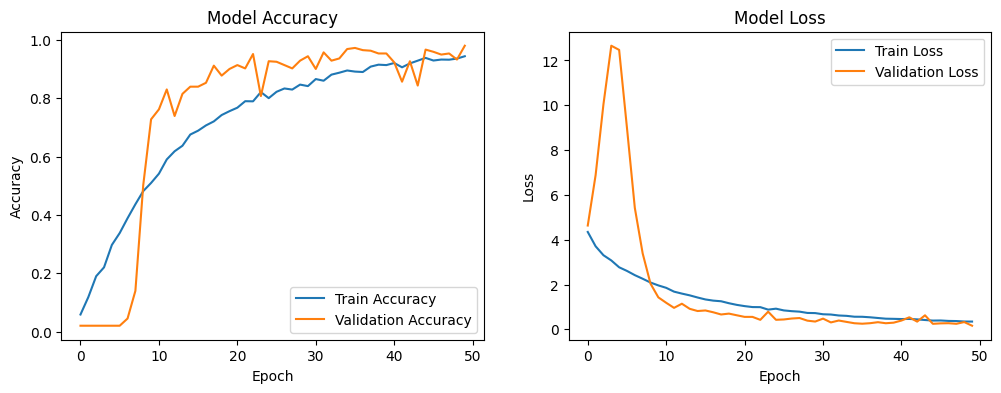

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.9715 - loss: 0.1789
Test Accuracy: 0.9792


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Data augmentation with additional flip for more variability
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Define the modified model with reduced regularization and dropout
model_writer = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1), kernel_regularizer=l2(0.00005)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.00005)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.00005)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.00005)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.00005)),
    BatchNormalization(),
    Dropout(0.4),  # Reduced dropout rate
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model with a lower learning rate
model_writer.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback with increased patience
early_stopping_writer = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Fit the model using data augmentation
history = model_writer.fit(
    datagen.flow(X_train_writer, y_train_writer, batch_size=32),
    epochs=50,
    validation_data=(X_test_writer, y_test_writer),
    callbacks=[early_stopping_writer]
)

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model_writer.evaluate(X_test_writer, y_test_writer)
print(f"Test Accuracy: {test_accuracy:.4f}")


In [12]:
model_writer.save('signature_recognition_part1.h5')

In [52]:
#Finding labels of test dataset
prediction =y_test_writer
writer_index=[]
for i in prediction:
    writer_index.append(np.argmax(i))
y_test_label=[]
for i in writer_index:
    y_test_label.append(label_encoder.inverse_transform([i])[0])
print("Labels for test data set calculated!")

prediction =model_writer.predict(X_test_writer)
writer_index=[]
for i in prediction:
    writer_index.append(np.argmax(i))
y_test_label_pred=[]
for i in writer_index:
    y_test_label_pred.append(label_encoder.inverse_transform([i])[0])
print("Lables Predicted!")

Labels for test data set calculated!
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step
Lables Predicted!


In [60]:
from sklearn.metrics import classification_report
report = classification_report(y_test_label, y_test_label_pred)
print(report)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        12
           3       0.89      1.00      0.94         8
           4       1.00      0.78      0.88         9
           5       0.91      1.00      0.95        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.97        15
           9       0.87      1.00      0.93        13
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        15
          12       0.88      1.00      0.93         7
          13       1.00      0.90      0.95        10
          14       1.00      1.00      1.00        12
          15       1.00      0.80      0.89         5
          16       1.00      1.00      1.00         4
          17       1.00      1.00      1.00        10
          18       1.00    

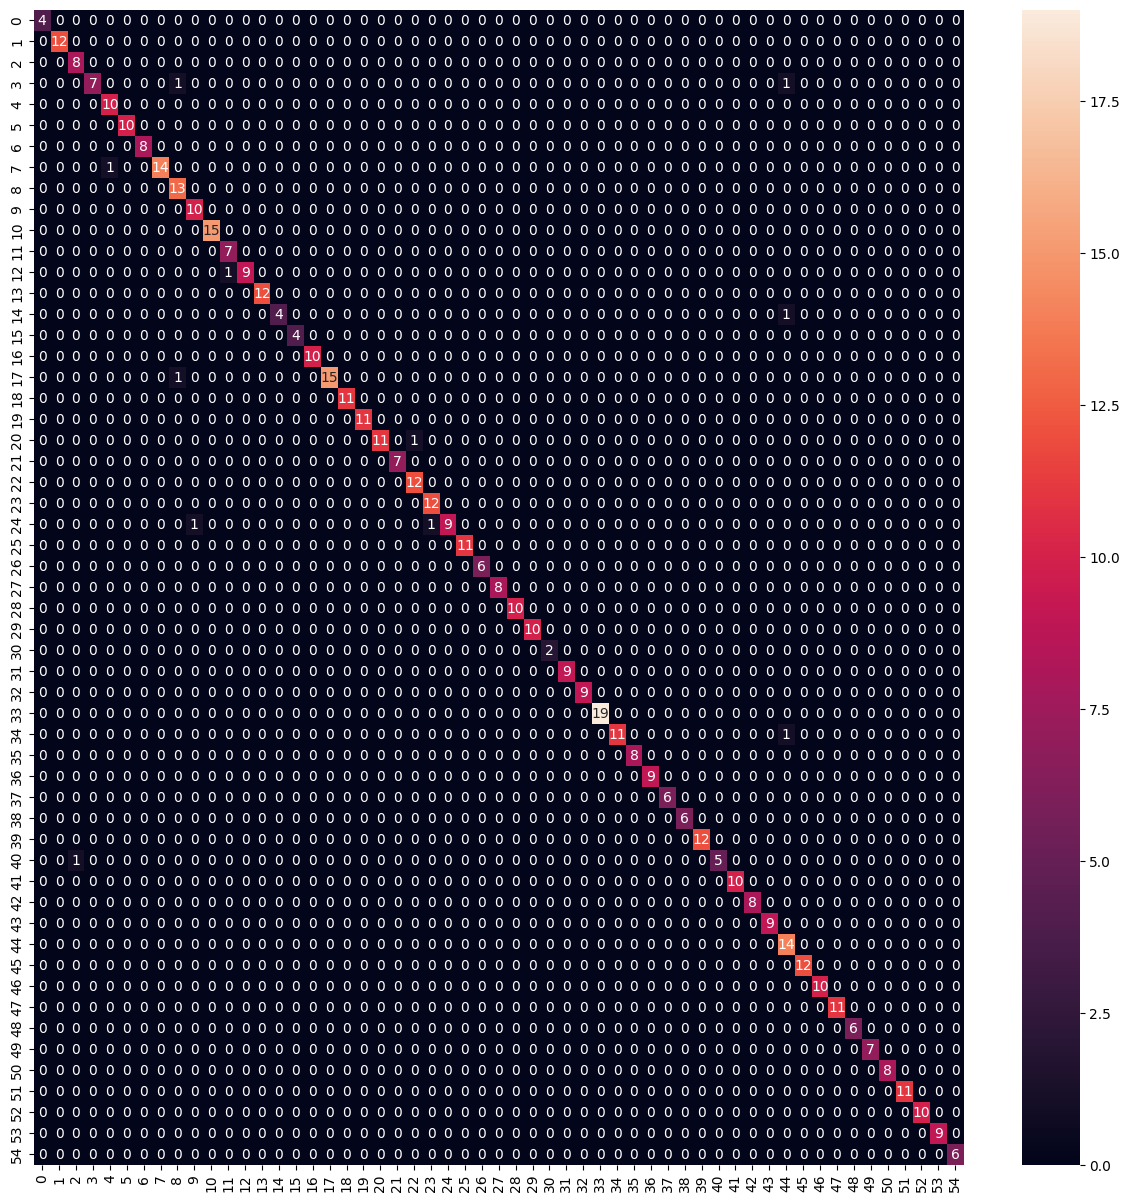

In [58]:
from sklearn import metrics
cnf = metrics.confusion_matrix(y_test_label,y_test_label_pred)
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(cnf,annot=True,fmt='g')
plt.show()

Loaded and resized 55 writers' forgery signatures.
Loaded and resized 55 writers' genuine signatures.


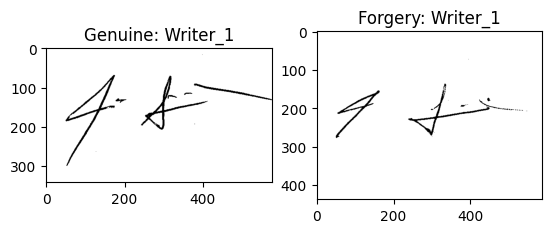

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Set the paths to the forgery and genuine directories
base_dir = r'C:\Users\kumar\Desktop\random\project\Codes\signatures'
forgery_dir = os.path.join(base_dir, 'full_forg')
genuine_dir = os.path.join(base_dir, 'full_org')
3
# Create dictionaries to store the signatures for each writer
writers_forgery = {}
writers_genuine = {}
 

# Function to load and resize images from a folder using the filename pattern (forgeries_X_Y or original_X_Y)
def load_and_resize_images(folder_path, prefix, num_writers=55, num_samples_per_writer=24):
    writer_dict = {}
    for i in range(1, num_writers + 1):  # Writers from 1 to 55
        writer_id = f"Writer_{i}"
        writer_images = []
        for j in range(1, num_samples_per_writer + 1):  # Images from 1 to 24 per writer
            filename = f"{prefix}_{i}_{j}.png"  # Generate the file name
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
            
            if image is not None:
                # Resize image to the specified size (e.g., 128x128)
                norm_img = np.zeros((image.shape[0], image.shape[1]))
                img = cv2.normalize(image, norm_img, 0, 255, cv2.NORM_MINMAX)
                img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
                writer_images.append((img, image_path))
            else:
                print(f"Warning: Image {image_path} not found.")
        
        writer_dict[writer_id] = writer_images
    return writer_dict

# Load and resize forgery and genuine images
writers_forgery = load_and_resize_images(forgery_dir, 'forgeries')
writers_genuine = load_and_resize_images(genuine_dir, 'original')

# Check loaded data (Optional)
print(f"Loaded and resized {len(writers_forgery)} writers' forgery signatures.")
print(f"Loaded and resized {len(writers_genuine)} writers' genuine signatures.")

# Example: Accessing the first writer's first genuine and forgery signature
writer_id = 'Writer_1'
genuine_sample = writers_genuine[writer_id][0][0]  # First genuine signature (resized image)
forgery_sample = writers_forgery[writer_id][0][0]  # First forgery signature (resized image)

# Display both for comparison
plt.subplot(1, 2, 1)
plt.title(f'Genuine: {writer_id}')
plt.imshow(genuine_sample, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f'Forgery: {writer_id}')
plt.imshow(forgery_sample, cmap='gray')

plt.show()



Epoch 1/50


D:\Program Files\Python3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 26s 366ms/step - accuracy: 0.4957 - loss: 1.0281 - val_accuracy: 0.4924 - val_loss: 0.8992
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 363ms/step - accuracy: 0.5012 - loss: 0.8784 - val_accuracy: 0.5360 - val_loss: 0.8300
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 361ms/step - accuracy: 0.5360 - loss: 0.8216 - val_accuracy: 0.6023 - val_loss: 0.7873
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 369ms/step - accuracy: 0.5758 - loss: 0.7913 - val_accuracy: 0.6004 - val_loss: 0.7472
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 362ms/step - accuracy: 0.5849 - loss: 0.7619 - val_accuracy: 0.5947 - val_loss: 0.7446
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 362ms/step - accuracy: 0.6059 - loss: 0.7415 - val_accuracy: 0.6553 - val_loss: 0.7009
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 364ms/step - accuracy: 0.6438 - loss: 0.7113 - val_accuracy: 0.6648 - val_loss: 0.6863
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 26s 386ms/step - accuracy: 0.6345 - loss: 0.7024 - val_accuracy: 0.670

Test Accuracy: 0.9981


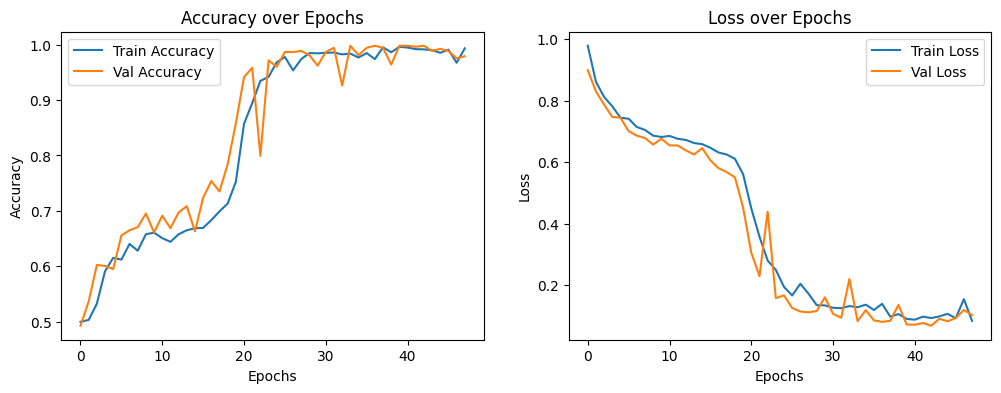

In [7]:
# Use data augmentation to generate more varied training images
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Build the CNN model with L2 regularization and Dropout layers
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.6))  # Increase dropout rate to 0.6 to reduce overfitting
model.add(Dense(2, activation='softmax'))  # Output layer (2 classes: genuine and forgery)

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=50, validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Save the model for later use
model.save('signature_recognition_model.h5')

# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Example: Pass a new test signature for recognition
def recognize_signature(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        resized_image = cv2.resize(image, (128, 128)) / 255.0
        reshaped_image = resized_image.reshape(1, 128, 128, 1)
        prediction = model.predict(reshaped_image)
        return 'Genuine' if np.argmax(prediction) == 0 else 'Forgery'
    else:
        return "Image not found"

# Test a sample image (replace with the actual test image path)
#sample_test_image = r'C:\path\to\test_image.png'
#result = recognize_signature(sample_test_image)
#print(f"Signature Recognition Result: {result}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9993 - loss: 0.0680
Test Accuracy: 0.9981
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
Accuracy Score: 0.9981060606060606


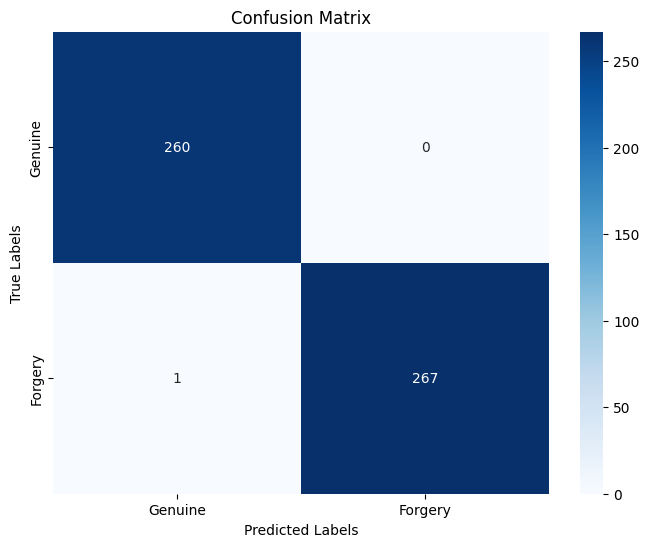

Classification Report:
               precision    recall  f1-score   support

     Genuine       1.00      1.00      1.00       260
     Forgery       1.00      1.00      1.00       268

    accuracy                           1.00       528
   macro avg       1.00      1.00      1.00       528
weighted avg       1.00      1.00      1.00       528



In [8]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('signature_recognition_model.h5')

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert true labels to class labels

# Print accuracy score
print("Accuracy Score:", accuracy_score(y_true_classes, y_pred_classes))

# Generate and display confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Forgery'], yticklabels=['Genuine', 'Forgery'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report for precision, recall, and F1 score
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes, target_names=['Genuine', 'Forgery']))
